# Les données

## Les imports

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Chargement des données

In [3]:
images = pd.read_csv('train.csv')

In [4]:
images.iloc[0,1:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

In [5]:
X, y = images.iloc[:,1:], images.iloc[:,0]

In [ ]:
X_test_final = pd.read_csv('test.csv')

# Plan

Etape 1 : Organisez votre projet
- Commencez par lister les différentes étapes de votre projet et répartissez-vous de façon
équitable les tâches
- Organisez des points d’avancement au sein de votre équipe pour partager vos avancées et
vos difficultés.

Etape 2 : Décrivez votre jeu de données
- Vérifiez les valeurs manquantes, la taille, le type ect…
- Identifiez les valeurs uniques et le nombre de données pour chaque valeur unique

Etape 3 : Visualisez votre jeu de données
- Affichez quelques chiffres
- Visualisez la matrice de corrélation de pixels. Est-ce normal ?

Etape 4 : Préparez vos données
- D’après vous est-il nécessaire de standardiser vos données ? Pourquoi ?

Etape 5 : Construisez votre modèle
- Essayez tout d’abord un modèle lineaire avec l’option linear kernel
- Puis essayez ‘poly’
- Et ‘rbf’
Utilisez dans un premier temps les paramètres par défaut.

Etape 6 : Evaluez votre modèle
En affichant la matrice de confusion, le classification report et la courbe ROC pour chacun des
modèles que vous avez construit.

Etape 7 : Choisissez le meilleur et optimisez les paramètres
En utilisant GridsearchCV, déterminer les paramètres optimaux et réimplémenter le modèle. Quel
score obtenez-vous ?

Etape 8 : Optionnel
Affichez quelques prédictions

# Etape 2 : Décrivez votre jeu de données

Vérifiez les valeurs manquantes, la taille, le type ect…

In [ ]:
images.shape

(42000, 785)

In [ ]:
images.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

Identifiez les valeurs uniques et le nombre de données pour chaque valeur unique

In [ ]:
images.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

<AxesSubplot:xlabel='label', ylabel='pixel0'>

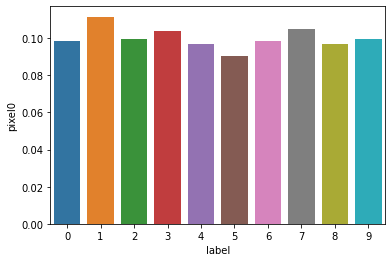

In [ ]:
proportions = images.groupby('label')['pixel0'].count() / images.shape[0]
sns.barplot(data=proportions.reset_index(), x='label', y='pixel0')

In [ ]:
proportions.describe()

count    10.000000
mean      0.100000
std       0.005645
min       0.090357
25%       0.097310
50%       0.098976
75%       0.102625
max       0.111524
Name: pixel0, dtype: float64

Les classes sont équilibrées avec une moyenne à 10% de proportion pour chaque classe

# Etape 3 : Visualisez votre jeu de données

3


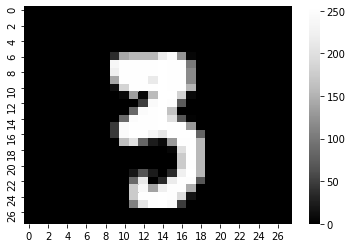

In [ ]:
n = 9855
print(images.iloc[n,0])
sns.heatmap(images.iloc[n,1:].values.reshape((28,28)), cmap="Greys_r");

Visualisez la matrice de corrélation de pixels. Est-ce normal ?

In [ ]:
pd.DataFrame(images.iloc[n,1:].values.reshape((28,28))).corr()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.196038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3


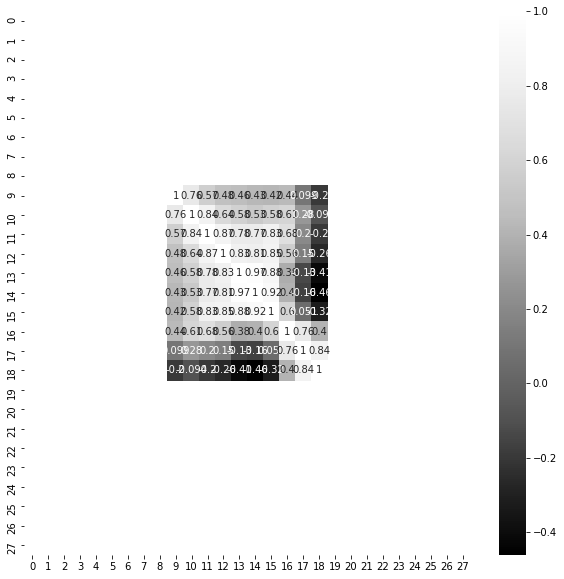

In [ ]:
plt.subplots(figsize=(10,10))
n = 9855
print(images.iloc[n,0])
sns.heatmap(pd.DataFrame(images.iloc[n,1:].values.reshape((28,28))).corr(), cmap="Greys_r" , annot=True);

# Etape 4 : Préparez vos données

D’après vous est-il nécessaire de standardiser vos données ? Pourquoi ?

Je pense que non car les valeurs sont déjà standardisées en sens car les valeurs fe pixels sont comprises entre 0 et 255 quelque soit la ligne < à vérifier


In [ ]:
# Réduction du X_Train fourni de 42000 enregistrements en 10 000 en respectant la proportion intiale 
from sklearn.model_selection import train_test_split
X_TReduit, X_TeReduit, y_TReduit, y_TeReduit = train_test_split(X, y, shuffle=True, test_size=32000, stratify=y, random_state=42)

In [ ]:
# Vérification du nombre d'enregistrments dans X_TReduit
print(X_TReduit.shape)
print(y_TReduit.shape)

(10000, 784)
(10000,)


In [ ]:
# affichage de quelques valeurs de label avec leur index
y_TReduit


25420    4
33967    6
18894    6
18206    7
39566    4
        ..
21733    0
8285     5
40444    5
13041    9
13153    0
Name: label, Length: 10000, dtype: int64

In [ ]:
# Copie de X_Treduit en XSup100 pour effectuer la transformation des gris supérieur à 150 en blanc
XSup150 = X_TReduit.copy()
XSup150.shape

(10000, 784)

In [ ]:
# Remplacement des valeurs pixel > à 150 en 255
XSup150[XSup150.iloc[:,0:] > 150]  = 255
XSup150

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Copie de XSup100 en XInf100 pour effectuer la transformation des gris inférieur à 100 en noir
XInf100 = XSup150.copy()
XInf100[XInf100.iloc[:,0:] < 100]  = 0
XInf100

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Copie de XSup100 en XInf100 pour effectuer la transformation des gris inférieur à 120 en noir et en blanc pour les pixels supérieurs à 120 
Xinf120sup = XSup150.copy()
Xinf120sup[Xinf120sup.iloc[:,0:] < 120]  = 0
Xinf120sup[Xinf120sup.iloc[:,0:] >= 120]  = 255
Xinf120sup

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import seaborn as sns
n = 25420
print(images.iloc[n,0])

4


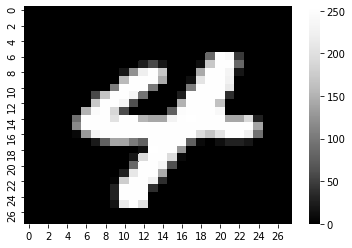

In [ ]:
sns.heatmap(X.loc[n,'pixel0':].values.reshape((28,28)), cmap="Greys_r");

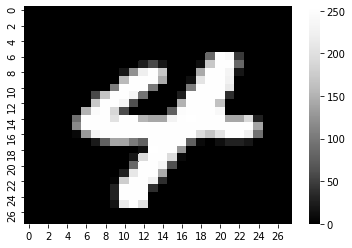

In [ ]:
sns.heatmap(X_TReduit.loc[n,'pixel0':].values.reshape((28,28)), cmap="Greys_r");

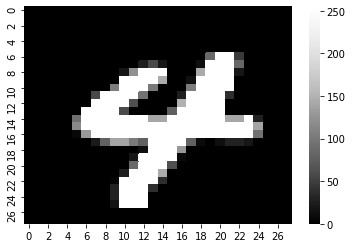

In [ ]:
sns.heatmap(XSup150.loc[n,'pixel0':].values.reshape((28,28)), cmap="Greys_r");

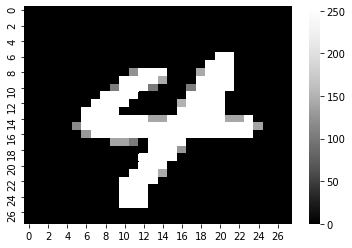

In [ ]:
sns.heatmap(XInf100.loc[n,'pixel0':].values.reshape((28,28)), cmap="Greys_r");

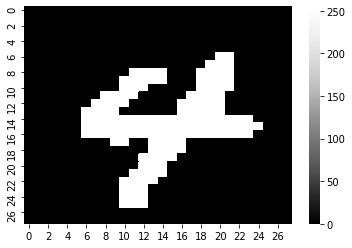

In [ ]:
sns.heatmap(Xinf120sup.loc[n,'pixel0':].values.reshape((28,28)), cmap="Greys_r");

# Etape 5 : Construisez votre modèle

## SVM par défaut

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((33600, 784), (8400, 784), (33600,), (8400,))

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(probability=True)

## SVM sur TReduit (10 000 enregistrements)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_TReduit, y_TReduit, shuffle=True, test_size=0.2, stratify=y_TReduit, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((8000, 784), (2000, 784), (8000,), (2000,))

In [ ]:
svc_model_TReduit = SVC(probability=True)
svc_model_TReduit 

SVC(probability=True)

In [ ]:
svc_model_TReduit.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
#score
svc_model_TReduit.score(X_test, y_test)

0.963

## SVM Remplacement pixel > 150 en pixel = 255 => en blanc

In [ ]:
X_train255, X_test255, y_train255, y_test255 = train_test_split(XSup150, y_TReduit, shuffle=True, test_size=0.2, stratify=y_TReduit, random_state=42)
X_train255.shape, X_test255.shape, y_train255.shape, y_test255.shape 

((8000, 784), (2000, 784), (8000,), (2000,))

In [ ]:
svc_model_T255 = SVC(probability=True)
svc_model_T255 

SVC(probability=True)

In [ ]:
svc_model_T255.fit(X_train255, y_train255)

#score
svc_model_T255.score(X_test255, y_test255)

0.9635

## SVM Remplacement pixel < 100 en pixel = 0 => en noir

In [ ]:
X_train100, X_test100, y_train100, y_test100 = train_test_split(XInf100, y_TReduit, shuffle=True, test_size=0.2, stratify=y_TReduit, random_state=42)
X_train100.shape, X_test100.shape, y_train100.shape, y_test100.shape 

((8000, 784), (2000, 784), (8000,), (2000,))

In [ ]:
svc_model_T100 = SVC(probability=True)
svc_model_T100 

SVC(probability=True)

In [ ]:
svc_model_T100.fit(X_train100, y_train100)

#score
svc_model_T100.score(X_test100, y_test100)

0.958

## SVM Remplacement pixel < 120 en pixel = 0 => en noir et pixel >= 120 en 255 blanc

In [ ]:
X_train120, X_test120, y_train120, y_test120 = train_test_split(Xinf120sup, y_TReduit, shuffle=True, test_size=0.2, stratify=y_TReduit, random_state=42)
X_train120.shape, X_test120.shape, y_train120.shape, y_test120.shape 
Xinf120sup

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40444,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
svc_model_T200 = SVC(probability=True)
 
svc_model_T200.fit(X_train120, y_train120)

#score
svc_model_T200.score(X_test120, y_test120)

0.9555

## Learning Curve

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
maxe = MinMaxScaler()

In [ ]:
maxe.fit_transform(X).shape

(42000, 784)

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores, fit_times, score_times= \
    learning_curve(svc_model, maxe.fit_transform(X), y, train_sizes=np.linspace(0.1, 1, 10), cv=3,return_times=True)


In [ ]:
train_sizes

array([ 2800,  5600,  8400, 11200, 14000, 16800, 19600, 22400, 25200,
       28000])

array([ 2800,  5600,  8400, 11200, 14000, 16800, 19600, 22400, 25200,
       28000])

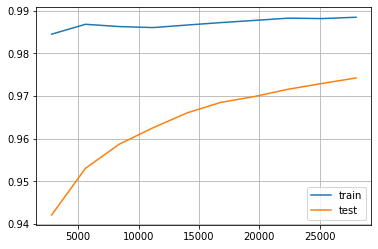

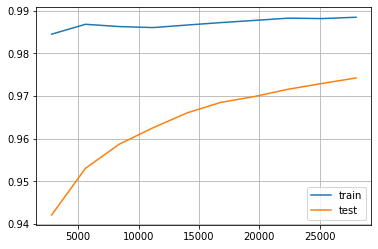

In [ ]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()
plt.grid(True);

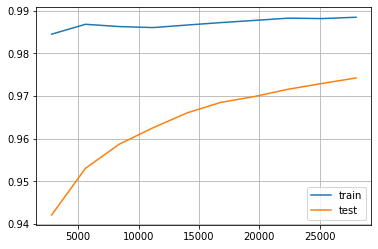

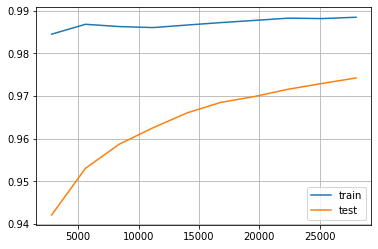

In [ ]:
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()
plt.grid(True);


In [ ]:
# Avec la data augementation 
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores, fit_times, score_times= \
    learning_curve(svc_model, maxe.fit_transform(X2), y2, train_sizes=np.linspace(0.1, 1, 10), cv=3,return_times=True)


In [ ]:
svc_model.fit(X_train, y_train)

SVC(probability=True)

SVC(probability=True)

SVC(probability=True)

In [ ]:
#score
svc_model.score(X_test, y_test)

NameError: name 'svc_model' is not defined

0.9741666666666666

0.963

In [ ]:
#Prédiction
y_pred = svc_model.predict(X_test)

<AxesSubplot:>

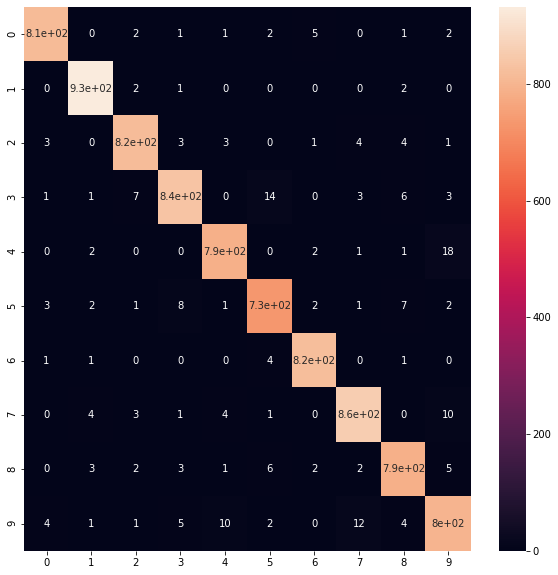

<AxesSubplot:>

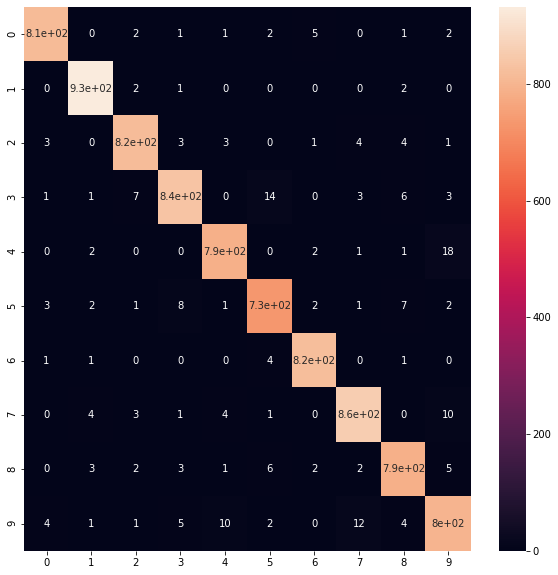

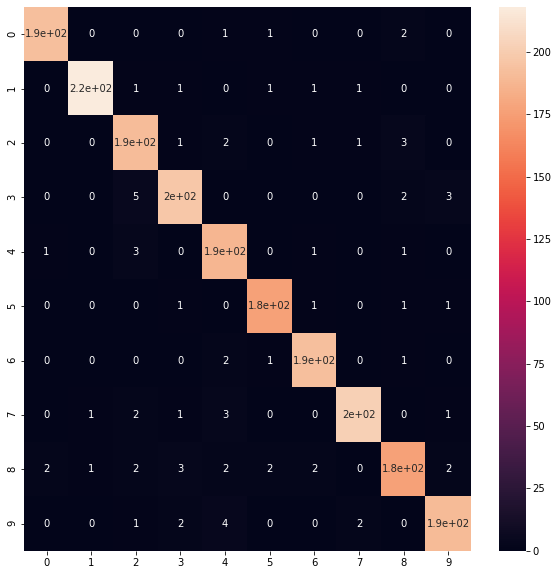

In [ ]:
from sklearn.metrics import confusion_matrix
target_names = list('0123456789')
plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred), 
index=target_names, columns=target_names)
, annot=True);

In [ ]:
y_pred_proba = svc_model.predict_proba(X_test)

In [ ]:
y_pred_proba.shape


(8400, 10)

(8400, 10)

(2000, 10)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
y_pred_proba[0]

array([1.35421567e-07, 2.33369719e-07, 9.99238102e-01, 6.27158925e-04,
       3.46081553e-07, 3.06153609e-05, 2.03502965e-06, 2.51473483e-06,
       9.72863978e-05, 1.57287521e-06])

array([2.53859685e-08, 9.99460829e-01, 3.05112811e-05, 4.70285137e-05,
       1.37193288e-05, 3.17997199e-06, 1.13462907e-06, 2.80294461e-04,
       1.33346922e-04, 2.99309746e-05])

array([7.25235600e-05, 5.00521916e-06, 4.08478641e-03, 1.29952540e-03,
       1.81545136e-05, 9.93295308e-05, 1.29488480e-05, 1.63821359e-05,
       9.94251052e-01, 1.40292207e-04])

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()


NameError: name 'full_pipeline' is not defined

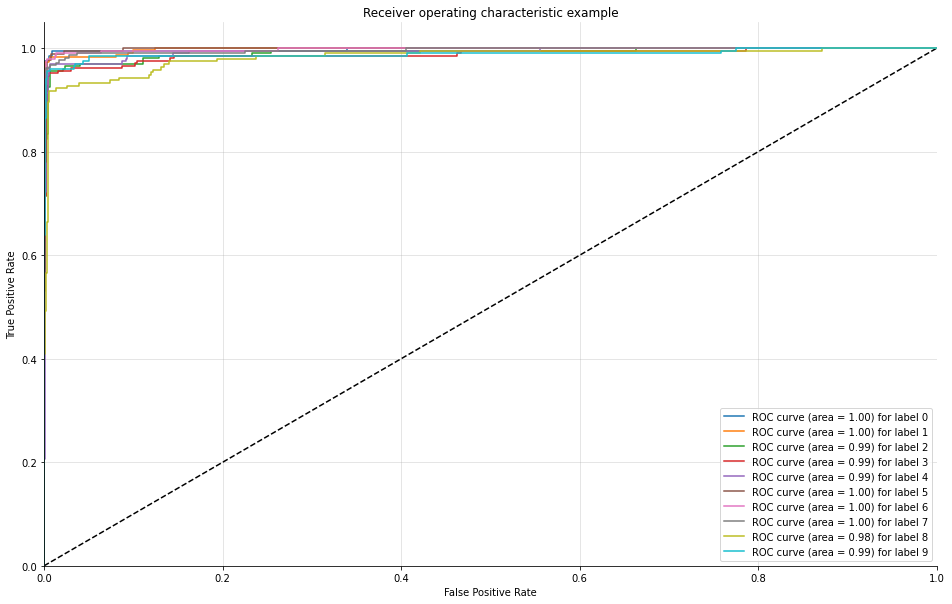

In [ ]:

plot_multiclass_roc(svc_model, X_test, y_test, n_classes=10, figsize=(16, 10))

In [ ]:
from sklearn.metrics import classification_report
target_names = list('0123456789')
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       826
           1       0.99      0.99      0.99       937
           2       0.98      0.98      0.98       835
           3       0.97      0.96      0.97       870
           4       0.98      0.97      0.97       814
           5       0.96      0.96      0.96       759
           6       0.99      0.99      0.99       828
           7       0.97      0.97      0.97       880
           8       0.97      0.97      0.97       813
           9       0.95      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       197
           1       0.99      0.98      0.98       223
           2       0.93      0.96      0.95       199
           3       0.96 

##  Linear kernel

In [ ]:
svc_model = SVC(probability=True, kernel='linear')

In [ ]:
svc_model.fit(X_train, y_train)

KernelInterrupted: Execution interrupted by the Jupyter kernel.

SVC(kernel='linear', probability=True)

In [ ]:
svc_model.score(X_test, y_test)

0.914

In [ ]:
y_pred = svc_model.predict(X_test)

<AxesSubplot:>

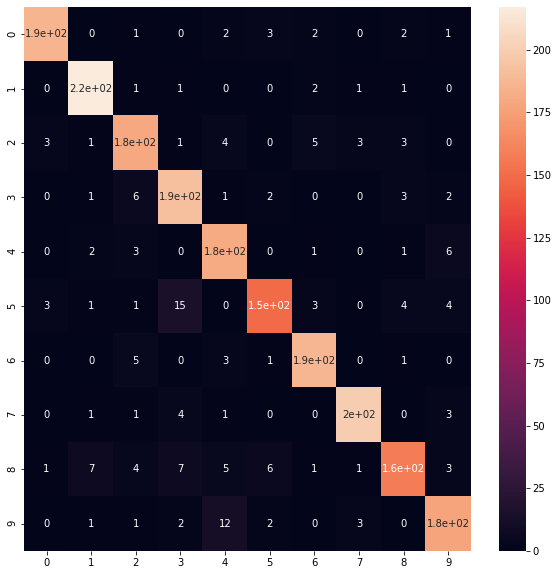

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred), 
index=target_names, columns=target_names)
, annot=True)

In [ ]:
classification_report(y_test, y_pred, target_names=target_names)

'              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95       197\n           1       0.94      0.97      0.96       223\n           2       0.89      0.90      0.89       199\n           3       0.86      0.93      0.90       207\n           4       0.87      0.93      0.90       194\n           5       0.91      0.83      0.87       181\n           6       0.93      0.95      0.94       197\n           7       0.96      0.95      0.96       210\n           8       0.91      0.82      0.86       193\n           9       0.90      0.89      0.90       199\n\n    accuracy                           0.91      2000\n   macro avg       0.91      0.91      0.91      2000\nweighted avg       0.91      0.91      0.91      2000\n'

## Poly

In [ ]:
svc_model = SVC(probability=True, kernel=‘poly’)

SyntaxError: invalid character in identifier (<ipython-input-69-f97e88973cce>, line 1)

In [ ]:
svc_model.fit(X_train, y_train)

In [ ]:
svc_model.score(X_test, y_test)

In [ ]:
y_pred = svc_model.predict(X_test)

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred), 
index=target_names, columns=target_names)
, annot=True)

In [ ]:
classification_report(y_test, y_pred, target_names=target_names)

## RBF

Déjà fait celui par défaut

# Etape 6 : Evaluez votre modèle 

Utilisé à chaque étape

# Etape 7 : Choisissez le meilleur modèle

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [ ]:
grid =  GridSearchCV(svc_m, parameters)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.score(X_test, y_test)

In [ ]:
y_pred_g = grid.predict(X_test)

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_g), 
index=target_names, columns=target_names)
, annot=True)

In [ ]:
classification_report(y_test, y_pred_g, target_names=target_names)

# Etape 8 : Optionnel Affichez quelques prédictions

In [ ]:
y_pred_final = grid.predict(X_test_final)

In [ ]:
n = 9855
print('la prédiction  :  ', y_pred_final.iloc[n])
sns.heatmap(X_test_final.iloc[n].values.reshape((28,28)), cmap="Greys_r");

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eefa2ee0-a143-4269-9af7-42f409f9b4f6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>